In [1]:
import numpy as np

import matplotlib.pyplot as plt
plt.style.use("seaborn")


from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score

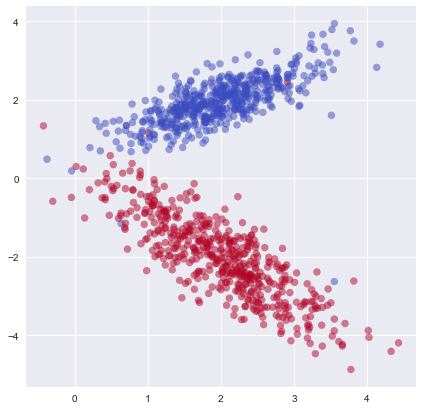

In [2]:
# генерим простой случай для классификации - почти линейно разделимый

X_blobs, y_blobs = make_classification(
    n_samples=1000, # число объектов
    n_features=2, n_informative=2, n_redundant=0, # хотим 2 информативных признака
    random_state=1, n_clusters_per_class=1, class_sep=2 # делаем два кластера
)

plt.figure(figsize=(7, 7))
plt.scatter(
    X_blobs[:, 0], X_blobs[:, 1], c=y_blobs, # передаем координаты и цвета
    alpha=0.5, # прозрачность
    cmap="coolwarm"
)
plt.show()

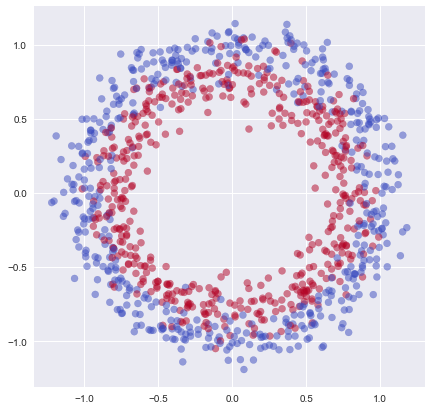

In [3]:
# генерим сложный случай для линейной классификации

X_circles, y_circles = make_circles(
    n_samples=1000, noise=0.1
)

plt.figure(figsize=(7, 7))
plt.scatter(
    X_circles[:, 0], X_circles[:, 1], c=y_circles, 
    alpha=0.5, 
    cmap="coolwarm"
)
plt.show()

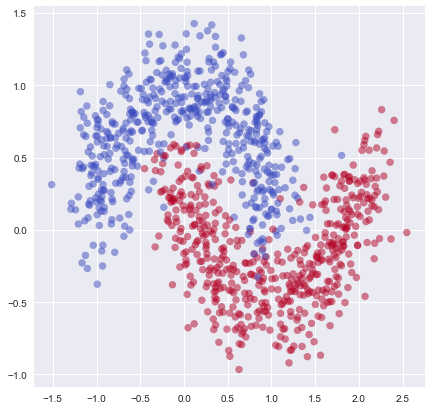

In [4]:
# генерим сложный случай для линейной классификации

X_moons, y_moons = make_moons(
    n_samples=1000, noise=0.2
)

plt.figure(figsize=(7, 7))
plt.scatter(
    X_moons[:, 0], X_moons[:, 1], c=y_moons, 
    alpha=0.5, 
    cmap="coolwarm"
)
plt.show()

In [5]:
def draw_decision_boundary(X, y, clf):

    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap="cool",
        plot_method="contour",
        levels=[-1, 0, 1],
    )
    plt.scatter(
        X[:, 0], X[:, 1], c=y, 
        alpha=0.5, 
        cmap="coolwarm"
    )
    
    plt.scatter( # обводка опорных векторов
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors='black'
    )
    
    xleft, xright = X[:, 0].min(), X[:, 0].max()
    yleft, yright = X[:, 1].min(), X[:, 1].max()
    plt.xlim([xleft, xright])
    plt.ylim([yleft, yright])
    
    plt.show()

In [6]:
datasets = [
    (X_blobs, y_blobs), 
    (X_circles, y_circles),
    (X_moons, y_moons)
]

In [7]:
clf = SVC(kernel="linear", C=1000, probability=True)

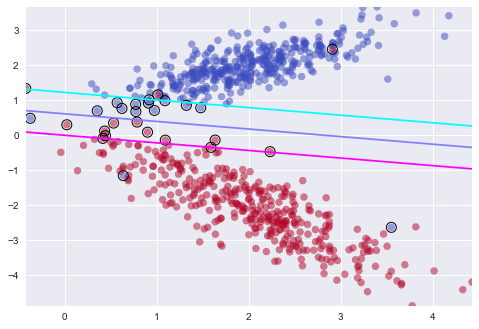

ROC AUC: 0.999552, F1: 0.992


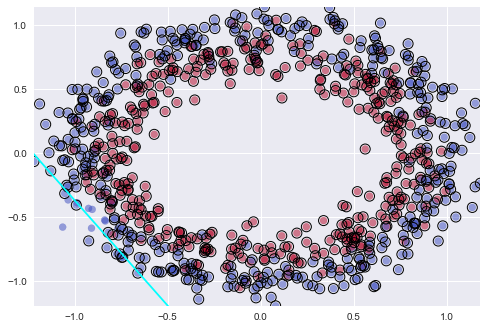

ROC AUC: 0.5453845660401565, F1: 0.0


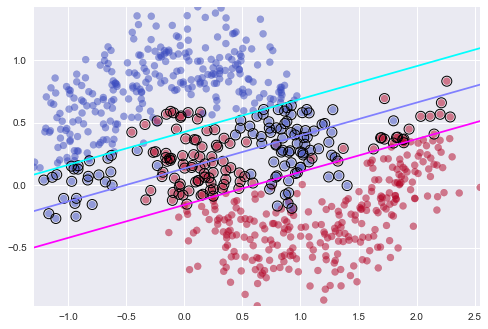

ROC AUC: 0.9275840000000001, F1: 0.8221343873517787


In [8]:
# хорошо видно, что выбросы выбираются опорными векторами
# тем не менее, почти идеальная классификация за счет линейной разделимости в 1 случае

# 2 случай, когда SVM вообще не справился с классификацией

# в 3 случае SVM провел оптимальную гиперплоскость

for X, y in datasets:
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    clf.fit(X_train, y_train)
    draw_decision_boundary(X_train, y_train, clf)
    
    auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    f1 = f1_score(y_test, clf.predict(X_test))
    print(f"ROC AUC: {auc}, F1: {f1}")

In [9]:
# Проверим, поможет ли выбор другого ядра в случае с вложенными сферами

In [10]:
clf = SVC(kernel="rbf", C=1000, probability=True)

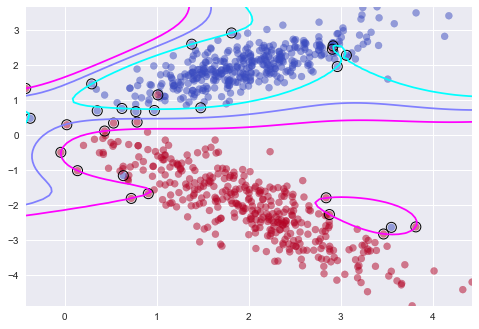

ROC AUC: 0.999936, F1: 0.992


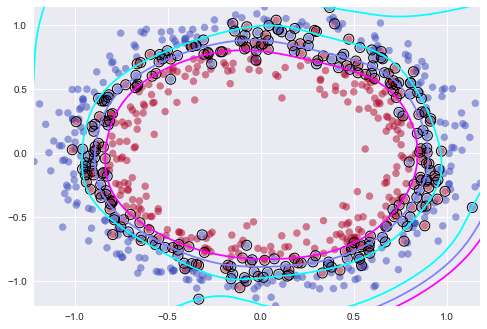

ROC AUC: 0.9110911540188595, F1: 0.842911877394636


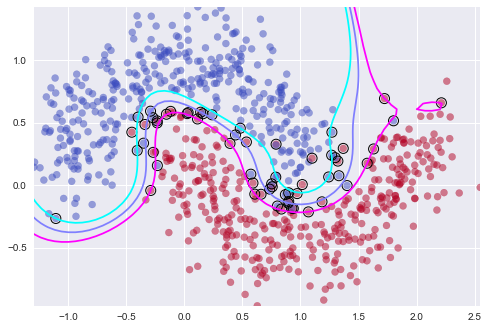

ROC AUC: 0.993216, F1: 0.9765625


In [11]:
# во всех случаях добавление ядра улучшило классификацию
# особенно показателен 2 и 3 кейс

for X, y in datasets:
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    clf.fit(X_train, y_train)
    draw_decision_boundary(X_train, y_train, clf)
    
    auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    f1 = f1_score(y_test, clf.predict(X_test))
    print(f"ROC AUC: {auc}, F1: {f1}")

In [12]:
# теперь проверим логрег на тех же данных

In [13]:
def draw_logreg_decision_boundary(X, y, clf):

    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap="cool",
        plot_method="contour",
        levels=[0],
    )
    plt.scatter(
        X[:, 0], X[:, 1], c=y, 
        alpha=0.5, 
        cmap="coolwarm"
    )

    xleft, xright = X[:, 0].min(), X[:, 0].max()
    yleft, yright = X[:, 1].min(), X[:, 1].max()
    plt.xlim([xleft, xright])
    plt.ylim([yleft, yright])
    
    plt.show()

In [14]:
clf = LogisticRegression(penalty=None)

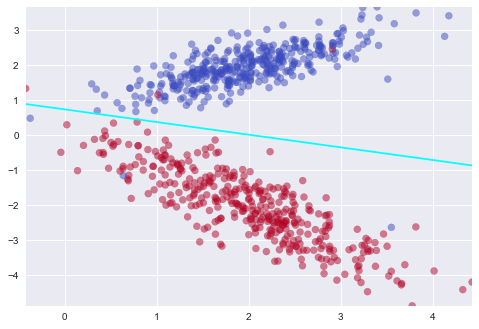

ROC AUC: 0.999488, F1: 0.992


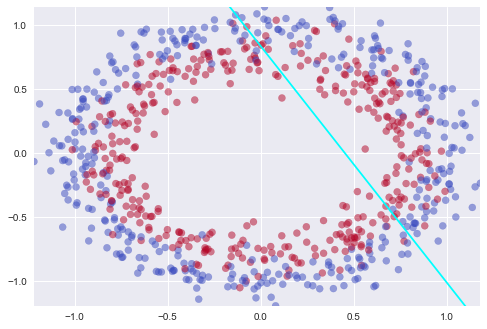

ROC AUC: 0.4542305471807043, F1: 0.4070796460176991


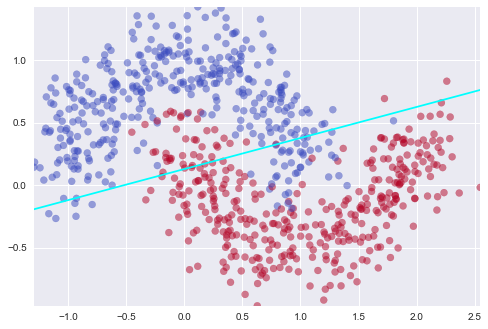

ROC AUC: 0.9270400000000001, F1: 0.808


In [15]:
# те же проблемы, что и в случае SVM без ядра

for X, y in datasets:
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    clf.fit(X_train, y_train)
    draw_logreg_decision_boundary(X_train, y_train, clf)
    
    auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    f1 = f1_score(y_test, clf.predict(X_test))
    print(f"ROC AUC: {auc}, F1: {f1}")

In [16]:
# Можно ли улучшить классификацию логрегом во 2 случае, если у нас нет механизма ядра?
# Если логрег - алгоритм линейной классификации, значит ли это что мы можем проводить только линейную границу

# Ответ - не только, за счет генерации признаков можно менять границу, 
# она будет линейная в пространстве всех признаков, но в проекции на 2 признака уже нет

In [17]:
X, y = (X_circles, y_circles)

In [18]:
X_extended = np.concatenate([X, (X[:, 0] ** 2 + X[:, 1] ** 2).reshape(-1, 1)], axis=1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_extended, y, random_state=0)
clf.fit(X_train, y_train)

auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
f1 = f1_score(y_test, clf.predict(X_test))
print(f"ROC AUC: {auc}, F1: {f1}")

ROC AUC: 0.9157739431650522, F1: 0.8413284132841329
